In [1291]:
# ----- IMPORTACION DE LIBRERIAS -----
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from otsu import umbralizacionOtsu
from collections import deque

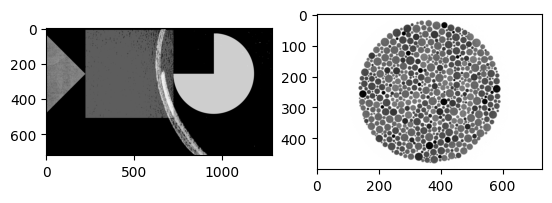

In [1292]:
# ----- IMAGENES DE PRUEBA -----
foto1 = 'figuras.png'
foto2 = 'circ.png'
imagen1 = cv2.imread(foto1,0)
imagen2 = cv2.imread(foto2,0)
plt.subplot(1, 2, 1)
plt.imshow(imagen1,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imagen2,cmap='gray')


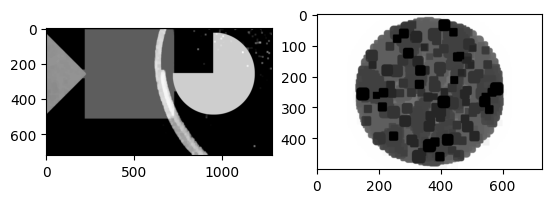

In [1293]:
kernel = np.ones((5,5))
img_dilation1 = cv2.dilate(imagen1, kernel, iterations=5)
img_erosion1 = cv2.erode(img_dilation1, kernel, iterations=3)

img_erosion2 = cv2.erode(imagen2, kernel, iterations=5)

plt.subplot(1, 2, 1)
cv2.imwrite('erosion1.png',img_erosion1)
plt.imshow(img_erosion1, cmap='gray')
plt.subplot(1, 2, 2)
cv2.imwrite('erosion2.png',img_erosion2)
plt.imshow(img_erosion2, cmap='gray')

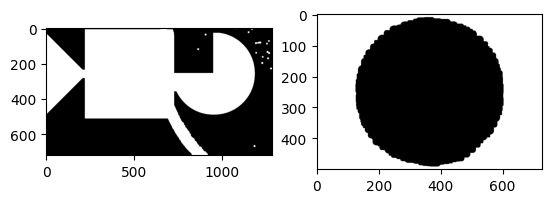

In [1294]:
# ------ BINARIZACION DE LA IMAGEN ------
umbral1, imgOtsu1 = umbralizacionOtsu('erosion1.png')
umbral2, imgOtsu2 = umbralizacionOtsu('erosion2.png')

imgOtsu18 = imgOtsu1.copy()
imgOtsu28 = imgOtsu2.copy()

plt.subplot(1, 2, 1)
plt.imshow(imgOtsu1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imgOtsu2, cmap='gray')

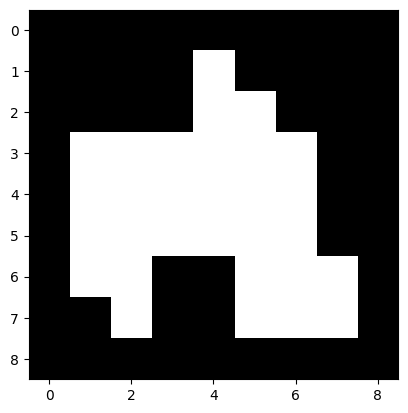

In [1295]:
prueba = np.array([[0,0,0,0,0,0,0,0,0],
[0,0,0,0,255,0,0,0,0],
[0,0,0,0,255,255,0,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,0,0,255,255,255,0],
[0,0,255,0,0,255,255,255,0],
[0,0,0,0,0,0,0,0,0]])

plt.imshow(prueba,cmap='gray')

In [1296]:
imagenn = imgOtsu1
imagennnn = imgOtsu18

In [1297]:
def tieneVecinoBlanco(x, y, img):
    return (
        x > 0 and img[x - 1, y] == 0 or
        y > 0 and img[x, y - 1] == 0 or
        x < img.shape[0] - 1 and img[x + 1, y] == 0 or
        y < img.shape[1] - 1 and img[x, y + 1] == 0
    )

def puntoInicio(imgBinarizada):
    # Encuentra el primer píxel blanco en los bordes de la imagen para comenzar la cadena
    for x in range(imgBinarizada.shape[0]):
        for y in range(imgBinarizada.shape[1]):
            if imgBinarizada[x, y] == 255 and tieneVecinoBlanco(x, y, imgBinarizada):
                return x, y
    return None

inicio = puntoInicio(imagenn)
print(inicio)

(0, 647)


In [1298]:
def esBorde(x, y, img):
    return (
        0 <= x < img.shape[0] and
        0 <= y < img.shape[1] and
        (
            img[x+1, y+1] == 0 or
            img[x-1, y-1] == 0 or
            img[x+1, y-1] == 0 or
            img[x-1, y+1] == 0 or
            img[x,y] == 0 or
            img[x, y+1] == 0 or
            img[x, y-1] == 0 or
            img[x+1, y] == 0 or
            img[x-1, y] == 0
        )
    )

def chainFreeman4(imgBinarizada, puntoInicio):
    cadena = []
    coordenadas = []

    filas, columnas = imgBinarizada.shape

    x, y = puntoInicio

    while True:
        if imgBinarizada[x, y] == -1:
            break

        if esBorde(x, y, imgBinarizada):
            coordenadas.append((x, y))
     
        imgBinarizada[x, y] = -1

        # Derecha
        if y < columnas - 1 and imgBinarizada[x, y + 1] == 255:
            cadena.append(0)
            y += 1
        # Arriba
        elif x > 0 and imgBinarizada[x - 1, y] == 255:
            cadena.append(3)
            x -= 1
        # Izquierda
        elif y > 0 and imgBinarizada[x, y - 1] == 255:
            cadena.append(2)
            y -= 1
        # Abajo
        elif x < filas - 1 and imgBinarizada[x + 1, y] == 255:
            cadena.append(1)
            x += 1
        else:
            # Si no se encuentra una dirección válida, retrocede
            if cadena:
                ultima_direccion = cadena.pop()
                if ultima_direccion == 0:
                    y -= 1
                elif ultima_direccion == 3:
                    x += 1
                elif ultima_direccion == 2:
                    y += 1
                elif ultima_direccion == 1:
                    x -= 1
            else:
                break  # Si no hay más direcciones en la cadena, termina la búsqueda
                
    return cadena, coordenadas



cadena4, coordenadas4 = chainFreeman4(imagenn, inicio)
print("Cadena: ", cadena4)
print("Coordenandas: ", coordenadas4)


Cadena:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [1299]:
def chainFreeman8(imgBinarizada, puntoInicio):
    cadena = []
    coordenadas = []

    # Obtiene las dimensiones de la imagen binarizada
    filas, columnas = imgBinarizada.shape

    x, y = puntoInicio

    while True:
        if imgBinarizada[x, y] == -1:
            break


        if esBorde(x, y, imgBinarizada):
            coordenadas.append((x, y))

        imgBinarizada[x, y] = -1

        # Derecha
        if y < columnas - 1 and imgBinarizada[x, y + 1] == 255:
            cadena.append(0)
            y += 1
        # Arriba-Derecha
        elif x > 0 and y < columnas - 1 and imgBinarizada[x - 1, y + 1] == 255:
            cadena.append(1)
            x -= 1
            y += 1
        # Arriba
        elif x > 0 and imgBinarizada[x - 1, y] == 255:
            cadena.append(2)
            x -= 1
        # Arriba-Izquierda
        elif x > 0 and y > 0 and imgBinarizada[x - 1, y - 1] == 255:
            cadena.append(3)
            x -= 1
            y -= 1
        # Izquierda
        elif y > 0 and imgBinarizada[x, y - 1] == 255:
            cadena.append(4)
            y -= 1
        # Abajo-Izquierda
        elif x < filas - 1 and y > 0 and imgBinarizada[x + 1, y - 1] == 255:
            cadena.append(5)
            x += 1
            y -= 1
        # Abajo
        elif x < filas - 1 and imgBinarizada[x + 1, y] == 255:
            cadena.append(6)
            x += 1
        # Abajo-Derecha
        elif x < filas - 1 and y < columnas - 1 and imgBinarizada[x + 1, y + 1] == 255:
            cadena.append(7)
            x += 1
            y += 1
        else:
            # Si no se encuentra una dirección válida, termina
            break

    return cadena, coordenadas

cadena8, coordenadas8 = chainFreeman8(imagennnn, inicio)
print("Cadena: ", cadena8)
print("Coordenandas: ", coordenadas8)

Cadena:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 

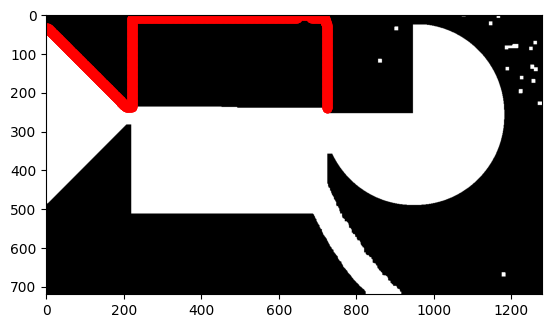

In [1300]:
# imagenn = 255 - imagenn

plt.imshow(imagenn, cmap='gray')
plt.plot([i[1] for i in coordenadas4], [i[0] for i in coordenadas4], 'ro')  
plt.show()

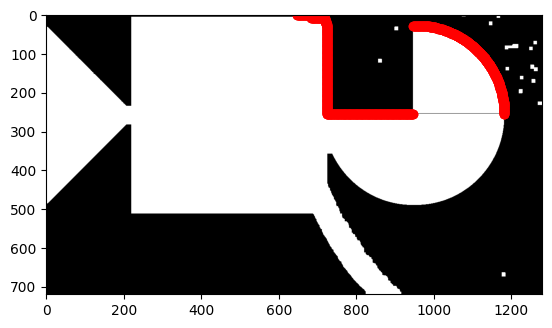

In [1301]:
# imagenn = 255 - imagenn

plt.imshow(imagennnn, cmap='gray')
plt.plot([i[1] for i in coordenadas8], [i[0] for i in coordenadas8], 'ro')  # 'ro' para puntos rojos
plt.show()

In [1302]:
def firstDifference(cadena):
     diferencias = []
     for i in range(1, len(cadena)):
        diff = (cadena[i] - cadena[i - 1]) % 4
        diferencias.append(diff)
     return diferencias

firstD4 = firstDifference(cadena4)
print("Cadena con diferencias minimas (4): ", firstD4)

firstD8 = firstDifference(cadena8)
print("Cadena con diferencias minimas (8): ", firstD8)

Cadena con diferencias minimas (4):  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1303]:
def minimumMagnitude(cadena):
    N = len(cadena)
    minimum_value = float('inf')  
    min_magnitude_cadena = None

    for _ in range(N):
        cadena_copy = deque(cadena)
        test_value = int(''.join(map(str, cadena_copy)))

        if test_value < minimum_value:
            minimum_value = test_value
            min_magnitude_cadena = list(cadena_copy)

        first_element = cadena[0]
        cadena[:-1] = cadena[1:]
        cadena[-1] = first_element

    return min_magnitude_cadena


mindM4= minimumMagnitude(firstD4)
print("Cadena con magnitud minima: ", mindM4)

mindM8 = minimumMagnitude(firstD8)
print("Cadena con magnitud minima: ", mindM8)

ValueError: Exceeds the limit (4300) for integer string conversion: value has 118732 digits; use sys.set_int_max_str_digits() to increase the limit

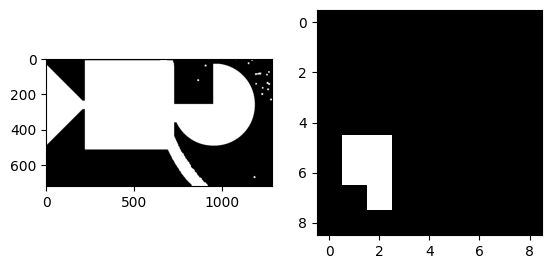

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(imgOtsu1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imagennnn, cmap='gray')
plt.plot([i[1] for i in coordenadas8], [i[0] for i in coordenadas8], 'ro')  # 'ro' para puntos rojos
